# Análisis Exploratorio

## **Descripción del conjunto de Datos**

Los datos se encuentran almacenados en una base de datos SQLite. En este Notebook, se lee el archivo `database.sqlite` por medio de Pandas.

In [10]:
# Importamos las librerías necesarias
import sqlite3
import pandas as pd
import seaborn as sns

In [2]:
# Conectar a la base de datos SQLite
connection = sqlite3.connect("database.sqlite")

# Obtener la lista de tablas en la base de datos
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, connection)

print("Tablas en la base de datos:", tables)

Tablas en la base de datos:                  name
0             apicall
1            commerce
2    contract_success
3  contract_unsuccess


Podemos observar que en la Base de Datos contamos con dos tablas:

* `apicall`
* `commerce`


### Llamados a la API, tabla `apicall`

Esta tabla contiene información sobre los llamados a la API de cada una de las empresas.

In [3]:
# Leer la tabla 'apicall' y almacenarla en un df
table_name_apicall = "apicall"
df_apicall = pd.read_sql(f"SELECT * FROM {table_name_apicall}", connection)

In [ ]:
# Obtener un resumen de los datos almacenados en df_apicall
df_apicall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 4 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   date_api_call  1500000 non-null  object 
 1   commerce_id    1500000 non-null  object 
 2   ask_status     1500000 non-null  object 
 3   is_related     1200495 non-null  float64
dtypes: float64(1), object(3)
memory usage: 45.8+ MB


In [ ]:
# Verificamos el tipo de datos de cada columna
df_apicall.dtypes

,0
date_api_call,object
commerce_id,object
ask_status,object
is_related,float64


In [ ]:
# Observar los primeros datos del df para obtener información
df_apicall.head(8)

,date_api_call,commerce_id,ask_status,is_related
0,2024-10-21 18:31:16,GdEQ-MGb7-LXHa-y6cd,Successful,1.0
1,2024-10-13 17:12:08,GdEQ-MGb7-LXHa-y6cd,Successful,1.0
2,2024-12-23 01:02:06,Rh2k-J1o7-zndZ-cOo8,Successful,1.0
3,2024-07-11 07:24:35,GdEQ-MGb7-LXHa-y6cd,Successful,1.0
4,2024-06-28 11:43:52,Rh2k-J1o7-zndZ-cOo8,Successful,1.0
5,2024-02-09 14:04:58,Rh2k-J1o7-zndZ-cOo8,Successful,1.0
6,2024-11-09 21:39:14,KaSn-4LHo-m6vC-I4PU,Unsuccessful,NaN
7,2024-12-06 02:22:22,KaSn-4LHo-m6vC-I4PU,Successful,0.0


In [ ]:
# Agrupar por commerce_id y contar los valores de is_related
result = df_apicall.groupby("commerce_id")["is_related"].agg(
    count_1 = lambda x: (x == 1.0).sum(),
    count_0 = lambda x: (x == 0.0).sum(),
    count_nan = lambda x: x.isna().sum()
).reset_index()

# Mostrar resultado
print(result)

           commerce_id  count_1  count_0  count_nan
0  3VYd-4lzT-mTC3-DQN5   160566    80025      59921
1  GdEQ-MGb7-LXHa-y6cd   159596    79911      60145
2  KaSn-4LHo-m6vC-I4PU   160320    79716      60064
3  Rh2k-J1o7-zndZ-cOo8   160088    79888      59805
4  Vj9W-c4Pm-ja0X-fC1C   160358    80027      59570


In [ ]:
# Valores únicos que contiene cada columna, excepto las fechas
columnas_apicall = ('commerce_id', 'ask_status', 'is_related')

print('Valores únicos')
print('-'*20)
for col in columnas_apicall:
  unique_values = df_apicall[col].unique()
  print(f'{col}: {unique_values}\n')

Valores únicos
--------------------
commerce_id: ['GdEQ-MGb7-LXHa-y6cd' 'Rh2k-J1o7-zndZ-cOo8' 'KaSn-4LHo-m6vC-I4PU'
 '3VYd-4lzT-mTC3-DQN5' 'Vj9W-c4Pm-ja0X-fC1C']

ask_status: ['Successful' 'Unsuccessful']

is_related: [ 1. nan  0.]



In [4]:
# Convertir la columna 'date_api_call' a datetime
df_apicall['date_api_call'] = pd.to_datetime(df_apicall['date_api_call'])

In [ ]:
# Verificar el nuevo formato
df_apicall['date_api_call'].iloc[0]

Timestamp('2024-10-21 18:31:16')

In [ ]:
# Ahora podemos acceder a los distintos componentes de la fecha
df_apicall['date_api_call'].iloc[0].month

10

In [ ]:
# Verificamos el rango de fechas de la data
print('Las fechas van desde', df_apicall['date_api_call'].min(),
      'hasta:', df_apicall['date_api_call'].max())

Las fechas van desde 2024-01-01 00:00:15 hasta: 2024-12-31 23:59:39


Podemos observar que la tabla `apicall` contiene 1.5M de registros, en los cuales contamos con 4 columnas:

* `date_api_call`: Contiene la fecha y hora en la cual se realizó el llamado a la API. El rango de fechas va desde Enero de 2024 hasta Diciembre de 2024. **Tipo inicial del dato:** `String`, **se convierte** a `datetime`.
* `commerce_id`: Contiene un identificador único de la empresa que realizó el llamado a la API, más adelante exploraremos la tabla `commerce` con la cual obtendremos la información de cada empresa. **Tipo de Dato:** `String`
* `ask_status`: Contiene información sobre si el llamado a la API se realizó o no de forma satisfactoria. **Tipo de Dato:** `String`
* `is_related`: Campo que contiene un valor que indica si el llamado a la API está relacionado con una consulta anterior. **Tipo de Dato:** `float`

En el resumen, podemos observar que la única columna que cuenta con nulos es `is_related`. Por este motivo, debemos realizar un análisis posterior sobre el tratamiento de dichos valores nulos y verificar si existe una relación entre esta columna y las demás.


In [ ]:
# Conteo de valores en la columna 'is_related'
df_apicall["is_related"].value_counts(dropna=False)

,count
is_related,
1.0,800928
0.0,399567
NaN,299505


Contamos con casi 300k valores nulos en la columna `is_related`

In [ ]:
df_apicall['ask_status'].value_counts(dropna=False)

,count
ask_status,
Successful,1200495
Unsuccessful,299505


Aparentemente, los valores `NaN` en la columna `is_related `corresponden a los valores `Unsuccessful` de la columna `ask_status`.

Verifiquemos esta hipótesis a continuación:

In [5]:
df_unsuccess = df_apicall[(df_apicall['ask_status'] == 'Unsuccessful')
                           & (df_apicall['is_related'].isna())]

In [ ]:
count = df_unsuccess.shape[0]

In [ ]:
# Conteo total de "Unsuccessful"
total_unsuccessful = df_apicall[df_apicall['ask_status'] == 'Unsuccessful'].shape[0]

# Comparación
if count == total_unsuccessful:
    print("Todos los 'Unsuccessful' tienen NaN en 'is_related'.")
else:
    print("Algunos 'Unsuccessful' tienen valores en 'is_related'.")


Todos los 'Unsuccessful' tienen NaN en 'is_related'.


### Empresas, tabla `commerce`

Esta tabla contiene información sobre las distintas empresas a las cuales BATSEJ OPEN FINANCE S.A. presta sus servicios.

In [ ]:
# Leer la tabla 'commerce' y almacenarla en un df
table_name_commerce = "commerce"
df_commerce = pd.read_sql(f"SELECT * FROM {table_name_commerce}", connection)

In [ ]:
# Mostrar los registros
df_commerce

,commerce_id,commerce_nit,commerce_name,commerce_status,commerce_email
0,KaSn-4LHo-m6vC-I4PU,445470636,Innovexa Solutions,Inactive,innovexasolutions@microfitsof.com
1,Vj9W-c4Pm-ja0X-fC1C,452680670,NexaTech Industries,Active,nexatechindustries@gemaily.net
2,Rh2k-J1o7-zndZ-cOo8,198818316,QuantumLeap Inc.,Active,quantumleapinc.@gemaily.net
3,3VYd-4lzT-mTC3-DQN5,28960112,Zenith Corp.,Active,zenithcorp.@gemaily.net
4,GdEQ-MGb7-LXHa-y6cd,919341007,FusionWave Enterprises,Active,fusionwaveenterprises@microfitsof.com


In [ ]:
df_commerce.dtypes

,0
commerce_id,object
commerce_nit,int64
commerce_name,object
commerce_status,object
commerce_email,object


Podemos observar que la tabla commerce contiene únicamente 5 registros, cada uno de ellos representa una de las empresas a las cual se le presta el servicio. Las columnas son las siguientes:

* `commerce_id`: Contiene el identificador único de cada una de las empresas, este está conformado por 16 valores alfanuméricos, separados por un guión '-' cada 4 valores.
 * **Tipo de Dato:** `String`
 * **Ejemplo:** `KaSn-4LHo-m6vC-I4PU`

* `commerce_nit`: Hace referencia al NIT de la empresa. Tener en cuenta que el NIT es el Número de Identificación Tributaria, y hace referencia al número único que utiliza el sistema de identificación tributaria para identificar cualquier empresa colombiana.
 * **Tipo de Dato:** `int64`
 * **Ejemplo:** `445470636`

* `commerce_name`: Contiene el nombre de la empresa.
 * **Tipo de Dato:** `String`
 * **Ejemplo:** `Innovexa Solutions`

* `commerce_status`: Contiene un valor que indica si a la empresa actualmente se le presta servicio (Activa o Inactiva).
 * **Tipo de Dato:** `Bool`
 * **Ejemplo:** `Inactive`
* Almacena el correo electrónico de la empresa en cuestión.
 * **Tipo de Dato:** `String`
 * **Ejemplo:** `innovexasolutions@microfitsof.com`



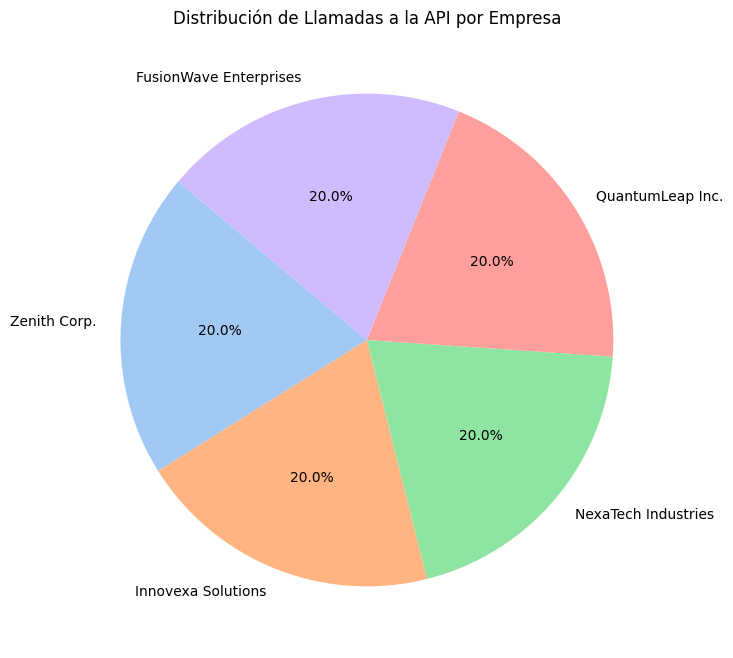

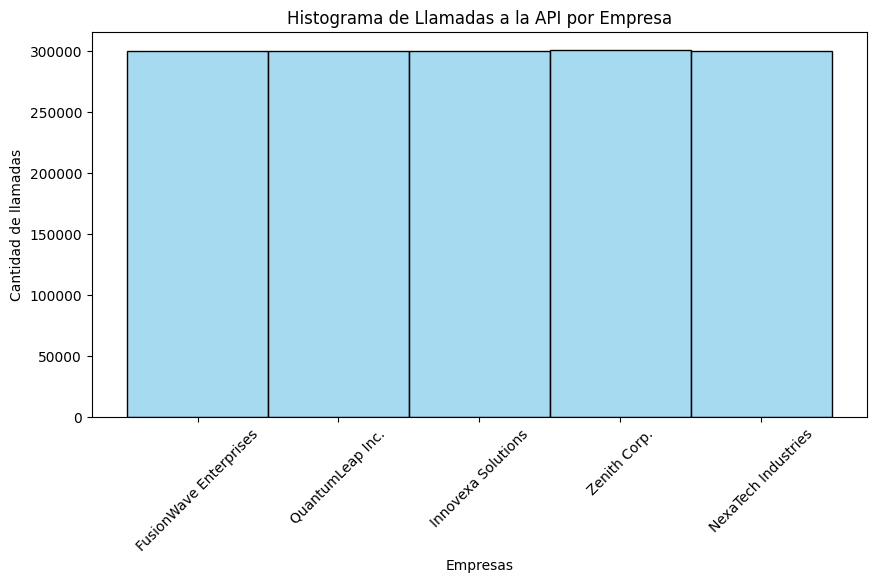

In [7]:
# Diccionario de mapeo ID -> Nombre de la empresa
company_names = {
    "KaSn-4LHo-m6vC-I4PU": "Innovexa Solutions",
    "Vj9W-c4Pm-ja0X-fC1C": "NexaTech Industries",
    "Rh2k-J1o7-zndZ-cOo8": "QuantumLeap Inc.",
    "3VYd-4lzT-mTC3-DQN5": "Zenith Corp.",
    "GdEQ-MGb7-LXHa-y6cd": "FusionWave Enterprises"
}

# Reemplazar los IDs con los nombres en el DataFrame
df_apicall["commerce_name"] = df_apicall["commerce_id"].replace(company_names)

# Contar llamadas por empresa
calls_per_company = df_apicall["commerce_name"].value_counts()

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(calls_per_company, labels=calls_per_company.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribución de Llamadas a la API por Empresa")
plt.show()

# Histograma
plt.figure(figsize=(10, 5))
sns.histplot(df_apicall["commerce_name"], discrete=True, bins=len(calls_per_company), color="skyblue")
plt.xlabel("Empresas")
plt.ylabel("Cantidad de llamadas")
plt.title("Histograma de Llamadas a la API por Empresa")
plt.xticks(rotation=45)
plt.show()


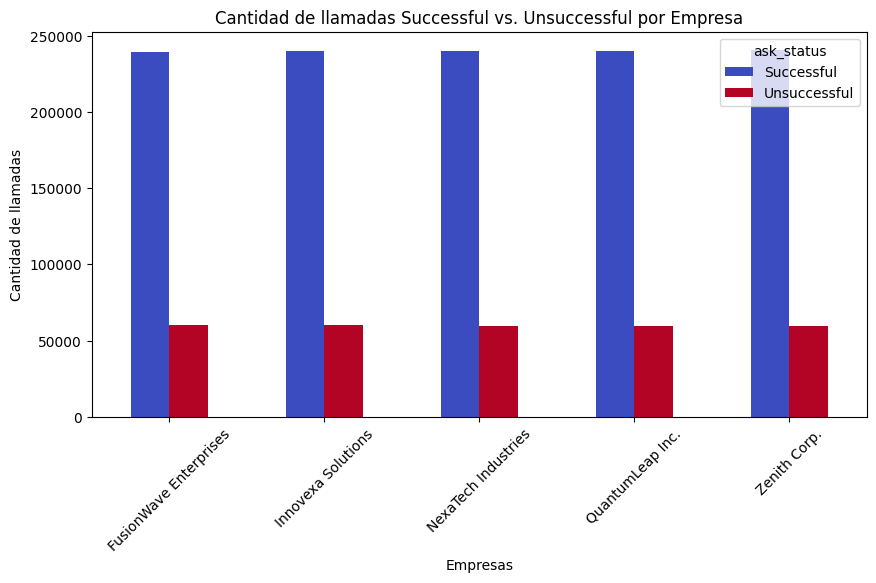

In [9]:
# Reemplazar los IDs con los nombres en el DataFrame
df_apicall["commerce_name"] = df_apicall["commerce_id"].replace(company_names)

# Contar por empresa y tipo de llamada
status_counts = df_apicall.groupby(["commerce_name", "ask_status"]).size().unstack()

# Gráfico de barras
status_counts.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xlabel("Empresas")
plt.ylabel("Cantidad de llamadas")
plt.title("Cantidad de llamadas Successful vs. Unsuccessful por Empresa")
plt.xticks(rotation=45)
plt.show()

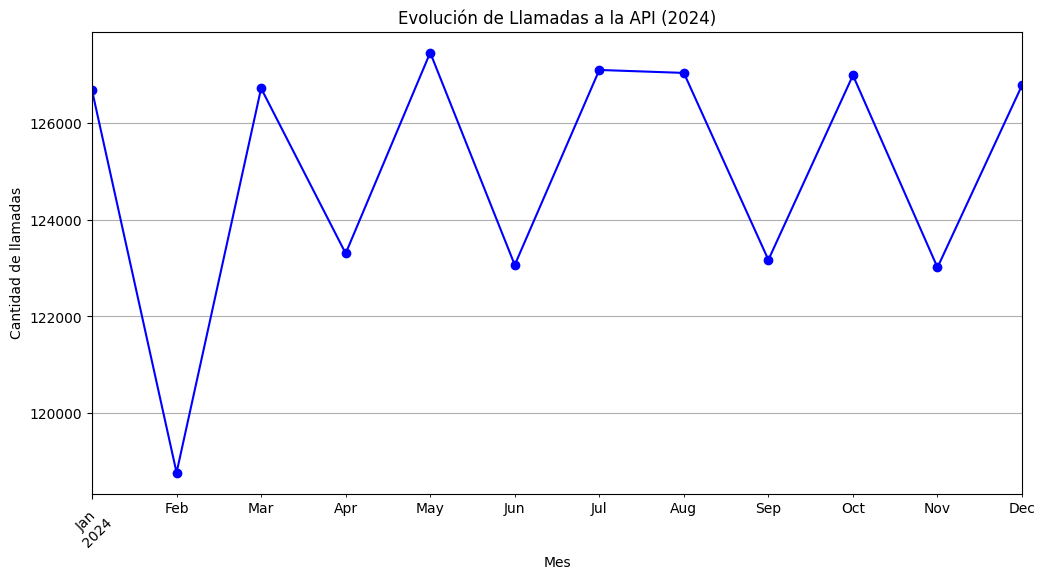

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agregar columna de año-mes
df_apicall["year_month"] = df_apicall["date_api_call"].dt.to_period("M")

# Contar llamadas por mes (sin discriminar por empresa)
time_series = df_apicall.groupby("year_month").size()

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
time_series.plot(marker="o", linestyle="-", color="b")  # Una sola línea azul
plt.xlabel("Mes")
plt.ylabel("Cantidad de llamadas")
plt.title("Evolución de Llamadas a la API (2024)")
plt.xticks(rotation=45)
plt.grid(True)  # Agregar líneas de referencia
plt.show()


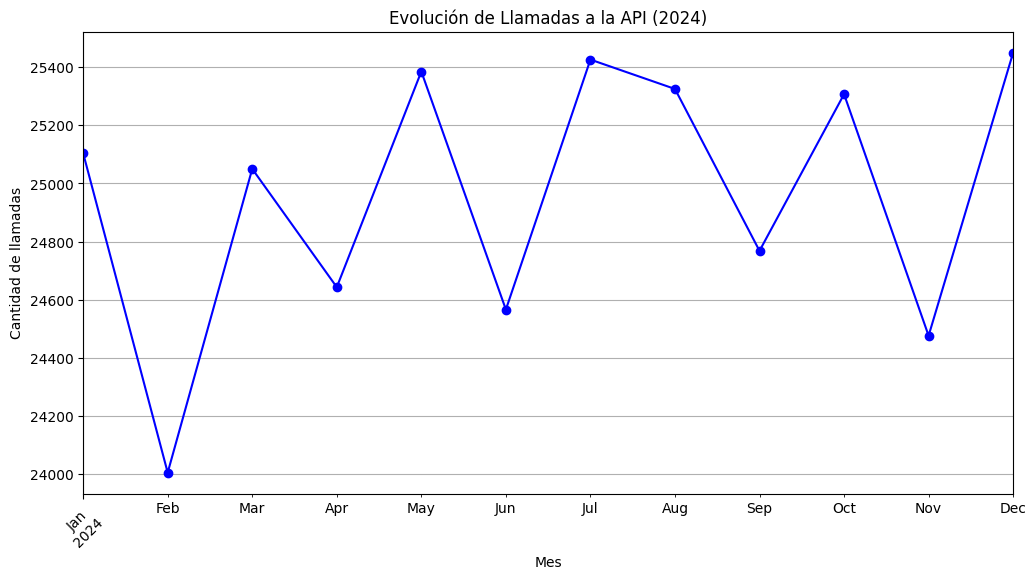

In [ ]:
# Filtrar solo por llamadas no exitosas
unsuccessful_calls = df_apicall[df_apicall["ask_status"] == "Unsuccessful"]

# Contar llamadas por mes
time_series = unsuccessful_calls.groupby("year_month").size()

# Graficar la serie temporal
plt.figure(figsize=(12, 6))
time_series.plot(marker="o", linestyle="-", color="b")  # Una sola línea azul
plt.xlabel("Mes")
plt.ylabel("Cantidad de llamadas")
plt.title("Evolución de Llamadas a la API (2024)")
plt.xticks(rotation=45)
plt.grid(True)  # Agregar líneas de referencia
plt.show()


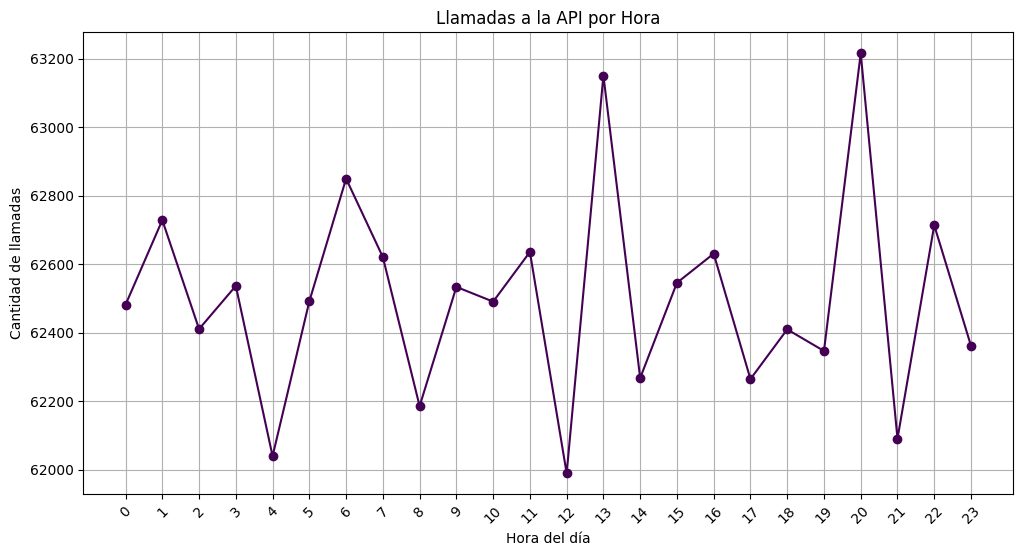

In [ ]:
# Extraer la hora
df_apicall["hour"] = df_apicall["date_api_call"].dt.hour

# Contar llamadas por hora
time_series = df_apicall.groupby("hour").size()

# Graficar
plt.figure(figsize=(12, 6))
time_series.plot(marker="o", linestyle="-", colormap="viridis", figsize=(12, 6))
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de llamadas")
plt.title("Llamadas a la API por Hora")
plt.xticks(range(0, 24))
plt.xticks(rotation=45)
plt.grid(True)  # Agregar líneas de referencia
plt.show()

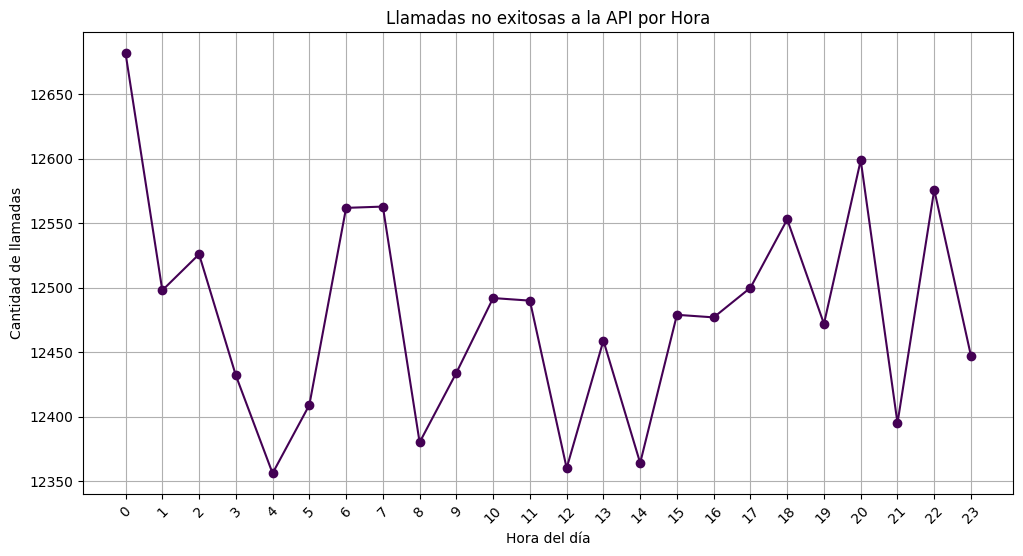

In [ ]:
# Filtrar solo por llamadas no exitosas
unsuccessful_calls = df_apicall[df_apicall["ask_status"] == "Unsuccessful"]

# Contar llamadas por hora
time_series = unsuccessful_calls.groupby("hour").size()

# Graficar
plt.figure(figsize=(12, 6))
time_series.plot(marker="o", linestyle="-", colormap="viridis", figsize=(12, 6))
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de llamadas")
plt.title("Llamadas no exitosas a la API por Hora")
plt.xticks(range(0, 24))
plt.xticks(rotation=45)
plt.grid(True)  # Agregar líneas de referencia
plt.show()

Al observar ambas gráficas, se pueden identificar ciertos patrones entre el total de llamadas a la API y la cantidad de llamadas no exitosas. Se aprecia que en horarios con un mayor número de llamadas totales también tienden a presentarse picos en las llamadas no exitosas, lo que sugiere una posible relación entre la carga del sistema y la tasa de fallos.

Si la cantidad de llamadas no exitosas crece de manera proporcional al total de llamadas, esto podría indicar que la API tiene una tasa de error constante, posiblemente por problemas recurrentes en la validación de peticiones o en la infraestructura. Sin embargo, si existen momentos en los que la tasa de fallos es más alta de lo habitual, esto podría deberse a sobrecargas en el sistema, lo que sugiere que la capacidad de la API no es suficiente para manejar ciertos picos de tráfico.

Si la sobrecarga es la causa principal de los fallos, una solución sería mejorar la escalabilidad del sistema, implementar balanceo de carga o analizar los límites de concurrencia en la infraestructura. También sería útil examinar si existen tareas de mantenimiento o despliegues en ciertos horarios que afecten el desempeño de la API. En caso de que los errores sean causados por peticiones mal formadas de los clientes, se podría trabajar en mejorar la documentación de la API y proporcionar mensajes de error más detallados para que los desarrolladores puedan corregir sus solicitudes.

### Variable is_related

In [ ]:
df_corr = df_apicall.copy()
df_corr["ask_status"] = df_corr["ask_status"].map({"Successful": 1, "Unsuccessful": 0})
df_corr["commerce_id"] = df_corr["commerce_id"].astype("category").cat.codes

In [ ]:
df_corr['date_api_call'] = pd.to_datetime(df_corr['date_api_call'])
df_corr['year'] = df_corr['date_api_call'].dt.year
df_corr['month'] = df_corr['date_api_call'].dt.month
df_corr['day'] = df_corr['date_api_call'].dt.day
df_corr.drop(['date_api_call', 'year_month'], axis=1, inplace=True)
df_corr

,commerce_id,ask_status,is_related,hour,year,month,day
0,1,1,1.0,18,2024,10,21
1,1,1,1.0,17,2024,10,13
2,3,1,1.0,1,2024,12,23
3,1,1,1.0,7,2024,7,11
4,3,1,1.0,11,2024,6,28
...,...,...,...,...,...,...,...
1499995,4,0,NaN,5,2024,6,28
1499996,0,0,NaN,16,2024,2,15
1499997,1,1,1.0,4,2024,4,18
1499998,2,1,0.0,0,2024,12,26


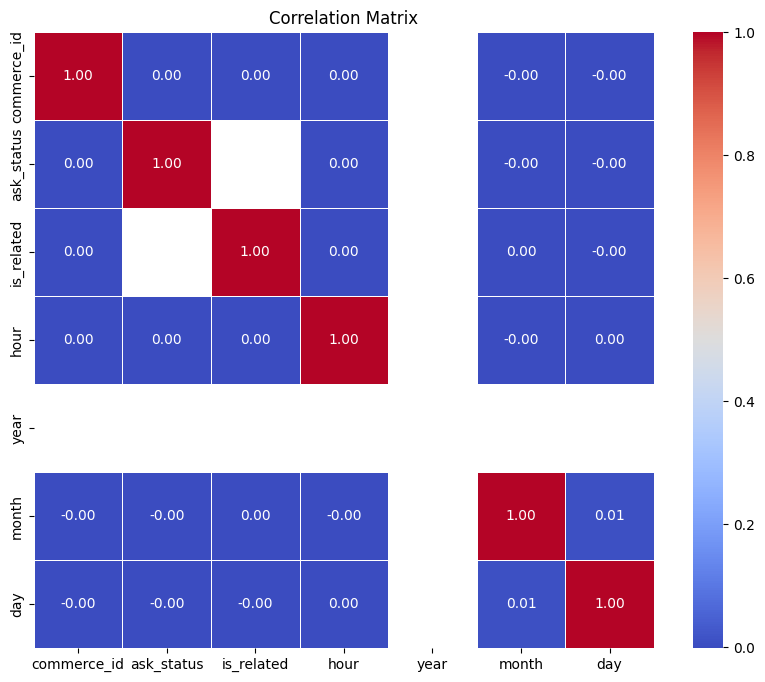

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlacion")
plt.show()

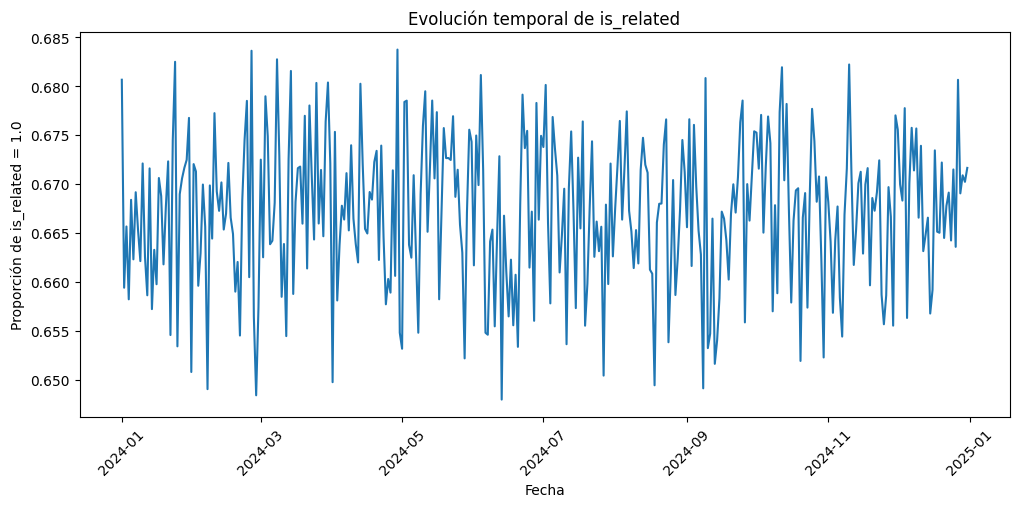

In [ ]:
df_exp = df_apicall.copy()

df_exp["date_api_call"] = pd.to_datetime(df_exp["date_api_call"])
df_grouped = df_exp.groupby(df_exp["date_api_call"].dt.date)["is_related"].mean()

plt.figure(figsize=(12, 5))
sns.lineplot(x=df_grouped.index, y=df_grouped.values)
plt.xticks(rotation=45)
plt.title("Evolución temporal de is_related")
plt.xlabel("Fecha")
plt.ylabel("Proporción de is_related = 1.0")
plt.show()


In [ ]:
df_filtrado = df_exp[df_exp["commerce_id"] == commerce_id_filtro]
df_sorted = df_filtrado.sort_values(by="date_api_call", ascending=True)

df_sorted

,date_api_call,commerce_id,ask_status,is_related,year_month,hour
1114665,2024-01-01 00:01:17,Rh2k-J1o7-zndZ-cOo8,Successful,1.0,2024-01,0
314191,2024-01-01 00:03:22,Rh2k-J1o7-zndZ-cOo8,Successful,1.0,2024-01,0
331476,2024-01-01 00:05:02,Rh2k-J1o7-zndZ-cOo8,Successful,0.0,2024-01,0
170104,2024-01-01 00:09:34,Rh2k-J1o7-zndZ-cOo8,Successful,0.0,2024-01,0
338642,2024-01-01 00:09:51,Rh2k-J1o7-zndZ-cOo8,Successful,1.0,2024-01,0
...,...,...,...,...,...,...
80215,2024-12-31 23:54:08,Rh2k-J1o7-zndZ-cOo8,Unsuccessful,NaN,2024-12,23
1196510,2024-12-31 23:55:08,Rh2k-J1o7-zndZ-cOo8,Successful,0.0,2024-12,23
671271,2024-12-31 23:55:10,Rh2k-J1o7-zndZ-cOo8,Successful,1.0,2024-12,23
649904,2024-12-31 23:55:11,Rh2k-J1o7-zndZ-cOo8,Successful,0.0,2024-12,23


No se detecta una relación clara de la variable is_related con el conjunto de datos, la matriz sugiere que las variables analizadas no tienen una fuerte relación entre sí. Esto puede indicar que cada una influye de manera independiente en el sistema analizado.

In [ ]:
# Cerrar la conexión
connection.close()